In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from datetime import datetime, timedelta, date

2023-05-03 02:15:17.834782: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('train.csv')
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.year.astype('str')+ '-' + df['date'].dt.month.astype('str')+ '-' + '01'
df = df[['month','sales']]
df['month'] = pd.to_datetime(df['month'])
df = df.groupby('month').sum().reset_index()
df.head()
# df.head()

,month,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242


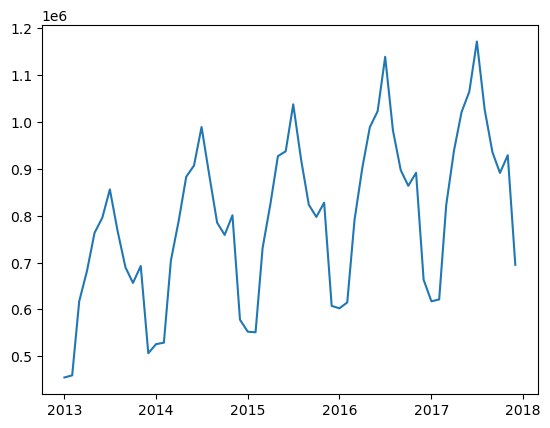

In [3]:
plt.plot(df['month'],df['sales'])
plt.show()

# Preparing Train/Test Data

In [7]:
df_sales = df['sales'].values.reshape(-1,1)
df_sales.shape

(60, 1)

In [10]:
train_data,test_data = df_sales[0:-6],df_sales[-6:]
print(train_data.shape,test_data.shape)
# train_data

(54, 1) (6, 1)


In [11]:
train_data[0:2]

array([[454904],
       [459417]])

In [12]:
sc = MinMaxScaler()
train_data_scaled = sc.fit_transform(train_data)
train_data_scaled
# train_data_scaled = train_data_scaled.reshape(-1,train_data.shape[1],1)
# X_train,y_train = train_data_scaled[:,1:],train_data_scaled[:,0:1]
# X_train = X_train.reshape(-1,X_train.shape[1],1)

# # X_test,y_test = test_data[:,1:],test_data[:,0:1]
# test_data_scaled = sc.transform(test_data)
# X_test = test_data_scaled[:,1:]
# X_test = X_test.reshape(-1,X_train.shape[1],1)
# original_sales = test_data[:,0:1]

# print(X_train.shape,X_test.shape)

array([[0.        ],
       [0.00659975],
       [0.23760555],
       [0.3325027 ],
       [0.45090917],
       [0.49822466],
       [0.5864431 ],
       [0.4560553 ],
       [0.34366509],
       [0.29493839],
       [0.34766618],
       [0.07560974],
       [0.10395078],
       [0.10852805],
       [0.36471467],
       [0.48845154],
       [0.62586171],
       [0.66090779],
       [0.78106912],
       [0.62983794],
       [0.4829091 ],
       [0.44453462],
       [0.5058086 ],
       [0.18008406],
       [0.14274203],
       [0.14099302],
       [0.40368726],
       [0.54044375],
       [0.69024325],
       [0.70527951],
       [0.85176086],
       [0.68073628],
       [0.53878394],
       [0.50064637],
       [0.54509121],
       [0.22325954],
       [0.21575311],
       [0.23405926],
       [0.49132805],
       [0.6537538 ],
       [0.78065965],
       [0.83028426],
       [1.        ],
       [0.77007783],
       [0.64626784],
       [0.5977254 ],
       [0.63839582],
       [0.304

In [51]:
X_train = []
y_train = []

for i in range(12,len(train_data)):
    X_train.append(train_data_scaled[i-12:i,0])
    y_train.append(train_data_scaled[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)
X_train = X_train.reshape(-1,X_train.shape[1],1)
X_train.shape

(42, 12, 1)

In [55]:
train_data_scaled[12:6]

array([], shape=(0, 1), dtype=float64)

In [35]:
inputs = df['sales'].values[len(df)-len(test_data)-12:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs

X_test = []

for i in range(12,len(inputs)):
    # print(inputs[i-12:i,1])
    X_test.append(inputs[i-12:i,0])

X_test = np.array(X_test)
X_test = X_test.reshape(-1,X_test.shape[1],1)
X_test.shape

(6, 12, 1)

In [43]:
original_sales = test_data
original_sales

array([[1171393],
       [1026403],
       [ 935263],
       [ 891160],
       [ 928837],
       [ 695170]])

In [36]:
regressorLSTM = Sequential([
    LSTM(units = 4, input_shape = (12,1)),
    # Dropout(0.2),
    # LSTM(units = 50, return_sequences = True),
    # Dropout(0.2),
    # LSTM(units = 50, return_sequences = True),
    # Dropout(0.2),
    # LSTM(units = 5),
    Dense(1)
])

regressorLSTM.compile(optimizer='adam',loss='mse')
regressorLSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
histLSTM = regressorLSTM.fit(X_train,y_train,epochs = 100,batch_size = 32)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 0.0704
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0662
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0629
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0598
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0575
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0562
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0544
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0539
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0533
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0529
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0527
Epoch 12/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0529
Epoch 13/100
2/2 [==============================] - 0s 5ms/st

In [40]:
y_pred = regressorLSTM.predict(X_test)
# y_pred = y_pred.reshape(-1,1,y_pred.shape[1])

# y_pred.shape
# y_pred
predicted_sales = sc.inverse_transform(y_pred)
predicted_sales

1/1 [==============================] - 0s 19ms/step


array([[905862.94],
       [935355.8 ],
       [920858.4 ],
       [902776.75],
       [888934.7 ],
       [889763.7 ]], dtype=float32)

In [45]:
r2_score(original_sales,predicted_sales)

0.039474055302770594

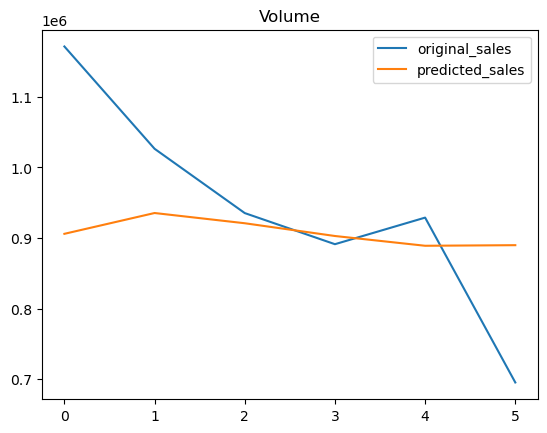

In [47]:
plt.plot(original_sales,label = 'original_sales')
plt.plot(predicted_sales, label = 'predicted_sales')
plt.title('Sales Volume')
plt.title('Volume')
plt.legend()
plt.show()